Travelling wave solutions often give clues to the general behaviour of solutions of a nonlinear wave equation. However, a more commonly encountered problem is when the population density is known at some initial time, and the subsequent evolution of the population is required. We attempt to solve the initial value problem on $0 \leq x \leq s(t)$,
\begin{align}
    &\rho_t = (\rho\rho_x)_x + \rho(1 - \rho), \\
    &\rho(x, 0) = \rho_0(x), \\
    &\rho_x(0, t) = 0, \\
    &\rho(s(t), t) = 0, \quad \rho_x(s(t), t) = -\dot{s}(t).
\end{align}
and for $s(t) < x$, we have $\rho(x, t) \equiv 0$. For numerical efficiency, we renormalise the domain $[0, s(t)]$, to $[0, 1]$, by introducing a new spatial coordinate $y = x/s(t)$.

By the chain rule and $\frac{\partial y}{\partial x} = \frac{1}{s(t)}$,
\begin{equation}
    \frac{\partial \rho}{\partial x} = \frac{\partial \rho}{\partial y}\frac{\partial y}{\partial x} = \frac{1}{s}\frac{\partial \rho}{\partial y}.
\end{equation}
Next, we transform the diffusion term. Note that
\begin{equation}
    \rho\frac{\partial \rho}{\partial x} = \frac{1}{2}\frac{\partial (\rho ^2)}{\partial x},
\end{equation}
hence
\begin{equation}
    \frac{\partial}{\partial x}\left(\rho\frac{\partial \rho}{\partial x}\right) = \frac{\partial}{\partial x}\left(\frac{1}{2}\frac{\partial (\rho ^2)}{\partial x}\right) = \frac{1}{2}\frac{\partial ^2(\rho ^2)}{\partial x^2}.
\end{equation}
Using our transformation for the first derivative,
\begin{equation}
    \frac{\partial (\rho^2)}{\partial x} = \frac{1}{s}\frac{\partial (\rho ^2)}{\partial y},
\end{equation}
so by applying another partial derivative and using the chain rule,
\begin{equation}
    \frac{\partial^2(\rho ^2)}{\partial x^2} = \frac{\partial}{\partial x} \left(\frac{1}{s}\frac{\partial (\rho^2)}{\partial y} \right) = \frac{1}{s}\frac{\partial}{\partial y}\left(\frac{1}{s}\frac{\partial (\rho^2)}{\partial y}\right) = \frac{1}{s^2}\frac{\partial^2(\rho^2)}{\partial y^2}.
\end{equation}
So, the full diffusion term transforms as
\begin{equation}
    \frac{\partial}{\partial x}\left(\rho\frac{\partial \rho}{\partial x}\right) = \frac{1}{2}\frac{\partial^2(\rho^2)}{\partial x^2} = \frac{1}{2s^2}\frac{\partial^2\rho^2}{\partial y^2}.
\end{equation}
Now for the time derivative, using the multivariable chain rule,
\begin{equation}
    \left.\frac{\partial \rho}{\partial t}\right|_x = \frac{\partial \rho}{\partial y}\left.\frac{\partial y}{\partial t}\right|_x + \left.\frac{\partial \rho}{\partial t}\right|_y.
\end{equation}
We have
\begin{equation}
    \left.\frac{\partial y}{\partial t}\right|_x = \frac{-x\dot{s}}{s^2} = - \frac{\dot{s}y}{s}.
\end{equation}
and substituting this back yields
\begin{equation}
    \left.\frac{\partial \rho}{\partial t}\right|_x = -\frac{\dot{s}y}{s}\frac{\partial \rho}{\partial y} + \left.\frac{\partial \rho}{\partial t}\right|_y.
\end{equation}

Now we substitute the transformed spatial and time derivatives back into the original PDE,
\begin{equation}
    \left.\frac{\partial \rho}{\partial t}\right|_x = \frac{1}{2}\frac{\partial^2 \rho^2}{\partial x^2} + \rho (1 - \rho),
\end{equation}
and rearrange to obtain the evolution equation
\begin{equation}
     \left.\frac{\partial \rho}{\partial t}\right|_y = \frac{1}{2s^2}\frac{\partial^2(\rho^2)}{\partial y^2} + \frac{\dot{s}y}{s}\frac{\partial \rho}{\partial y} + \rho (1 - \rho)
\end{equation}

Finally we need to transform the boundary conditions,
\begin{align}
    \rho_x(0, t) = 0 &\implies \rho_y(0, t) = 0, \\
    \rho(s(t), t) = 0 &\implies \rho(1, t) = 0, \\
    \rho_x(s(t), t) = -\dot{s}(t)$ &\implies \rho_y(1, t) = -s\dot{s}.
\end{align}


---

We consider a simple finite-difference method, where spatial derivatives are expressed using centred differences and the solution is advanced in time using forward Euler. Writing $t_j = j(\Delta t)$ and $y_n = n/N$, for $n = 0, 1, \dots, N$, and using the notation $\rho_{j,n} \equiv \rho(t_j, y_n)$ and $s_j \equiv s(t_j)$ we discretise the evolution equation in the form,
\begin{align}
    \frac{\rho_{j+1,n} - \rho_{j,n}}{\Delta t} &= \frac{1}{2s_j^2} \frac{\rho_{j,n+1}^2 - 2\rho_{j,n}^2 + \rho_{j,n-1}^2}{(\Delta y)^2} + \frac{\dot{s}_jy_n}{s_j}\frac{\rho_{j,n+1} - \rho_{j,n-1}}{2(\Delta y)} + \rho_{j,n}(1 - \rho_{j,n}), \quad n = 1, 2, \dots, N - 1 \\
    \rho_{j,0} &= \rho_{j,1}, \\
    \rho_{j,N} &= 0, \\
    \frac{s_{j+1} - s_j}{\Delta t} &= \dot{s}_j = -s_j^{-1}\frac{\rho_{j,N-2} - 4\rho_{j,N-1}}{2\Delta y},
\end{align}
where $\Delta y = 1/N$. The expression for $\dot{s}_j$ is obtained by using the final condition in with a three-point backward difference expression for $\rho_y(y = 1)$. The main drawback to this method is that $\Delta t$ must be chosen very small to ensure numerical stability.

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def solve_population_dynamics(N=100, dt=0.0001, t_max=10.0):
    '''
    Solves the given PDE using the specified finite difference method.
    Args:
        N: Number of spatial grid points.
        dt: Time step size.
        t_max: Maximum simulation time.
    Returns:
        dict: A dictionary containing results for plotting.
    '''
    # Initialisation
    dy = 1.0 / N
    y = np.linspace(0, 1, N + 1)
    rho = 0.3 * np.exp(y) * (1 - y)
    rho[N] = 0  # Enforce rho(y=1) = 0
    s = 1.0
    t = 0.0

    # Data storage
    results = {
        'times_to_plot': [0, 2, 4, 6, 8, 10],
        'snapshots': {},
        'time_history': [],
        's_history': [],
        's_dot_history': []
    }

    # Store initial state
    results['snapshots'][0] = {'x': s * y, 'rho': rho.copy()}

    num_steps = int(t_max / dt)
    plot_steps = [int(t_val / dt) for t_val in results['times_to_plot'][1:]]

    # Main Time-Stepping Loop
    for j in range(1, num_steps + 1):
        # Store history for plotting
        results['time_history'].append(t)
        results['s_history'].append(s)

        # Calculate s_dot and update s
        s_dot = (1 / s) * (4 * rho[N-1] - rho[N-2]) / (2 * dy)
        results['s_dot_history'].append(s_dot)
        s_next = s + dt * s_dot

        # Calculate next rho
        rho_next = np.zeros_like(rho)

        # Loop over interior points
        for n in range(1, N):
            # Discretised terms from the equation
            diffusion = (1 / (2 * s**2)) * \
                        (rho[n+1]**2 - 2*rho[n]**2 + rho[n-1]**2) / dy**2

            convection = (s_dot * y[n] / s) * \
                         (rho[n+1] - rho[n-1]) / (2 * dy)

            reaction = rho[n] * (1 - rho[n])

            # Update rho using Forward Euler
            rho_next[n] = rho[n] + dt * (diffusion + convection + reaction)

        # Apply Boundary Conditions
        rho_next[0] = rho_next[1]  # rho_y(0,t) = 0
        rho_next[N] = 0            # rho(1,t) = 0

        # Update state for next iteration
        rho = rho_next
        s = s_next
        t = j * dt

        # Store snapshots for plotting
        if j in plot_steps:
            time_key = results['times_to_plot'][plot_steps.index(j) + 1]
            results['snapshots'][time_key] = {'x': s * y, 'rho': rho.copy()}

    return results

def get_travelling_wave_solution(c, xi):
    '''
    Calculates the travelling wave solution for comparison.
    '''
    from scipy.integrate import solve_ivp

    def ode_system(xi_val, y_val):
        phi, phi_prime = y_val
        if phi == 0: return [phi_prime, 0]
        phi_double_prime = (-phi_prime**2 - c * phi_prime - phi * (1 - phi)) / phi
        return [phi_prime, phi_double_prime]

    lam = (-c + np.sqrt(c**2 + 4)) / 2
    y0 = [1 - 1e-6, -lam * 1e-6]

    sol = solve_ivp(ode_system, [min(xi), max(xi)], y0, dense_output=True, method='LSODA')
    phi_sol = sol.sol(xi)[0]

    # Normalise
    origin_shift_idx = np.argmin(np.abs(phi_sol - 0.5))
    origin_shift_val = xi[origin_shift_idx]
    return xi - origin_shift_val, phi_sol

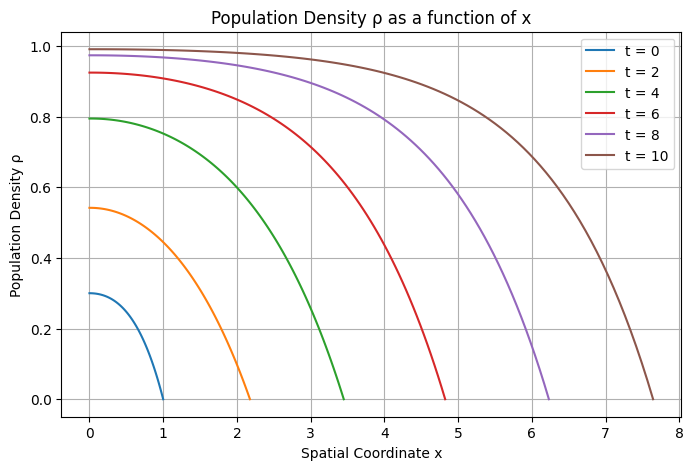

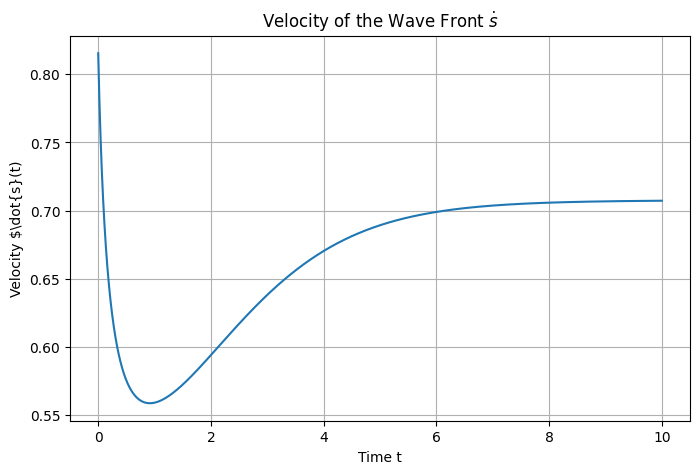

Estimated large-time wave speed c ≈ 0.7073


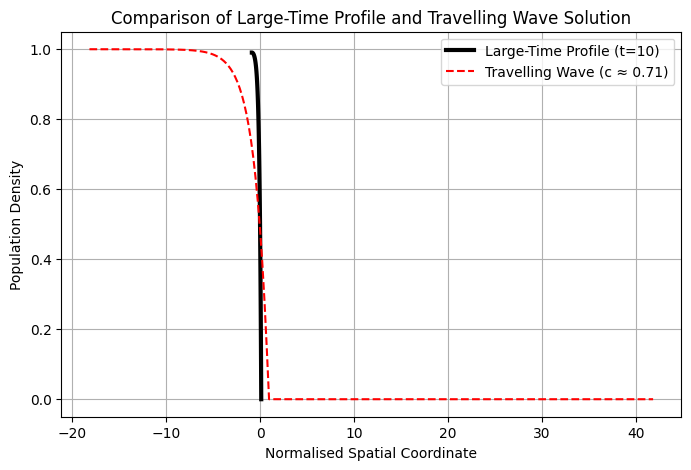

In [14]:
sim_results = solve_population_dynamics(N=100, dt=0.0001, t_max=10.0)

# Plot 1: Solution rho(x, t) at different times
plt.figure(figsize=(8, 5))
for t_plot, data in sim_results['snapshots'].items():
    plt.plot(data['x'], data['rho'], label=f't = {t_plot}')
plt.title('Population Density ρ as a function of x')
plt.xlabel('Spatial Coordinate x')
plt.ylabel('Population Density ρ')
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Wave front velocity s_dot(t)
plt.figure(figsize=(8, 5))
plt.plot(sim_results['time_history'], sim_results['s_dot_history'])
plt.title(f'Velocity of the Wave Front $\\dot{{s}}$')
plt.xlabel('Time t')
plt.ylabel(f'Velocity $\\dot{{s}}(t)')
plt.grid(True)
plt.show()

# Plot 3: Comparison with Travelling Wave Solutions
plt.figure(figsize=(8, 5))

# Get the final profile from the simulation
final_time = max(sim_results['snapshots'].keys())
final_rho = sim_results['snapshots'][final_time]['rho']
y_grid = np.linspace(0, 1, len(final_rho))

# Normalise the simulation profile
origin_shift_idx_sim = np.argmin(np.abs(final_rho - 0.5))
origin_shift_val_sim = y_grid[origin_shift_idx_sim]
y_shifted = y_grid - origin_shift_val_sim

plt.plot(y_shifted, final_rho, label=f'Large-Time Profile (t={final_time})',
            linewidth=3, color='black')

# Estimate the final wave speed c from the simulation
final_c = sim_results['s_dot_history'][-1]
print(f"Estimated large-time wave speed c ≈ {final_c:.4f}")

# Plot the corresponding travelling wave solution
xi_plot = np.linspace(-30, 30, 500)
xi_shifted, phi_wave = get_travelling_wave_solution(final_c, xi_plot)
plt.plot(xi_shifted, phi_wave, label=f'Travelling Wave (c ≈ {final_c:.2f})',
            linestyle='--', color='red')

plt.title('Comparison of Large-Time Profile and Travelling Wave Solution')
plt.xlabel('Normalised Spatial Coordinate')
plt.ylabel('Population Density')
plt.legend()
plt.grid(True)
plt.show()